# 基于招商证券行情数据的基本分布分析
> v0.1
> 
> 20160414
> 
> 主要是涨幅和价格的分析

导入模块

In [1]:
import tushare as ts
import pylab
import pandas as pd
import numpy as np
%matplotlib inline
code='600999'

### 获得基础信息

In [2]:
bi=ts.get_stock_basics()
name=bi.ix[code].name
st=bi.ix[code].timeToMarket
st=str(st)
starttime=st[:4]+'-'+st[4:6]+'-'+st[6:8]
bi.ix[code]

name                       招商证券
industry                     证券
area                         深圳
pe                         9.65
outstanding              480310
totals                   580814
totalAssets         2.91656e+07
liquidAssets                  0
fixedAssets             45130.5
reserved            1.94039e+06
reservedPerShare           3.34
esp                       1.878
bvps                       8.32
pb                         2.18
timeToMarket           20091117
Name: 600999, dtype: object

### 获得近三年的日线数据

In [3]:
dp=ts.get_hist_data(code)
dp[:5]

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2016-04-15,18.32,18.39,18.12,18.00,220490.53,-0.24,-1.31,18.048,17.949,17.915,354127.45,318117.78,457507.01,0.46
2016-04-14,18.35,18.52,18.37,18.12,241376.23,0.12,0.66,17.874,17.928,17.855,352672.09,343649.68,462544.84,0.50
2016-04-13,17.85,18.55,18.26,17.85,585825.00,0.55,3.11,17.724,17.857,17.764,350072.48,363031.43,474488.30,1.22
2016-04-12,17.82,17.93,17.70,17.50,193408.81,-0.09,-0.51,17.694,17.743,17.661,285536.67,335304.00,457979.79,0.40
2016-04-11,17.97,18.45,17.79,17.63,529536.69,0.55,3.19,17.820,17.703,17.595,320360.97,347038.17,472458.40,1.10


### 获得涨幅数据列，并绘制涨幅分布图

最小值： -10.01
最大值： 10.03
平均值： 0.126385041551
标准差： 3.27368897115


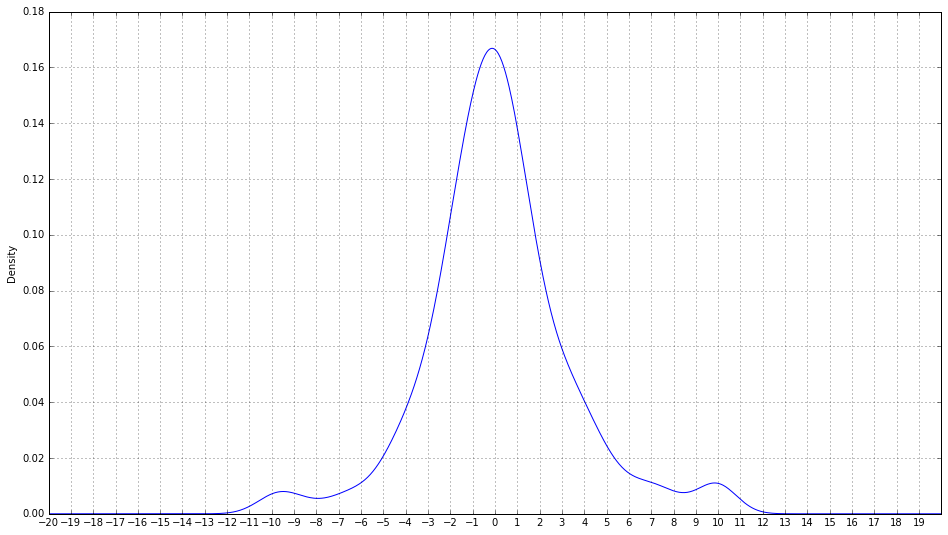

In [4]:
pc=dp.p_change
pxt=np.arange(-20,20,1)
pxl=[-20,20]
pc.plot(kind='kde',grid=True,figsize=(16,9),xticks=pxt,xlim=pxl)
print '最小值：',pc.min()
print '最大值：',pc.max()
print '平均值：',pc.mean()
print '标准差：',pc.std()

-  

-  

### 近20日的涨幅数据及分布图

最小值： -4.71
最大值： 9.98
平均值： 0.3775
标准差： 3.32444039612


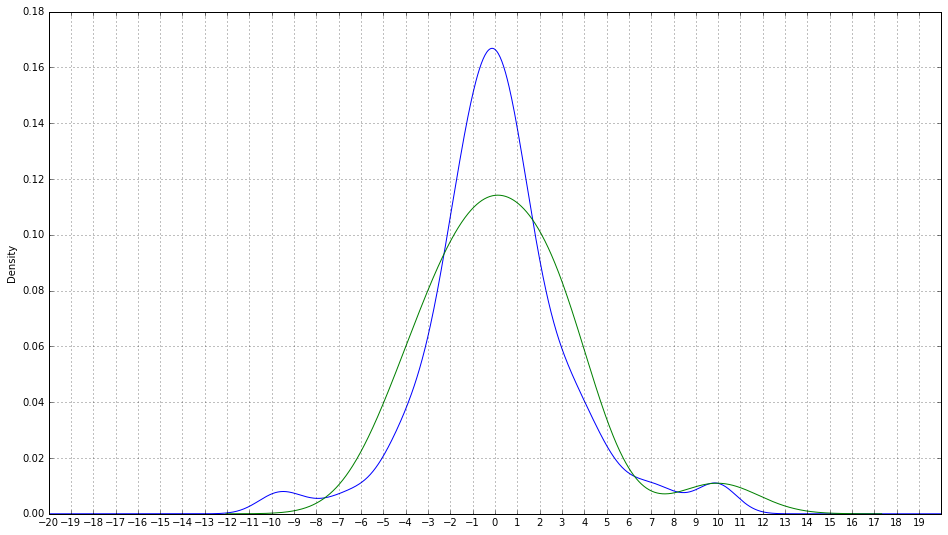

In [5]:
pc20=dp[:20].p_change
pc.plot(kind='kde',grid=True,figsize=(16,9),xticks=pxt,xlim=pxl)
pc20.plot(kind='kde',grid=True,figsize=(16,9),xticks=pxt,xlim=pxl)
print '最小值：',pc20.min()
print '最大值：',pc20.max()
print '平均值：',pc20.mean()
print '标准差：',pc20.std()

- 根据月内数据与三年数据的比较，判断近期行情的重心

### 分析三年数据的收盘价分布情况

最小值： 9.77
最大值： 38.3
平均值： 16.8780747922
标准差： 7.43661174245


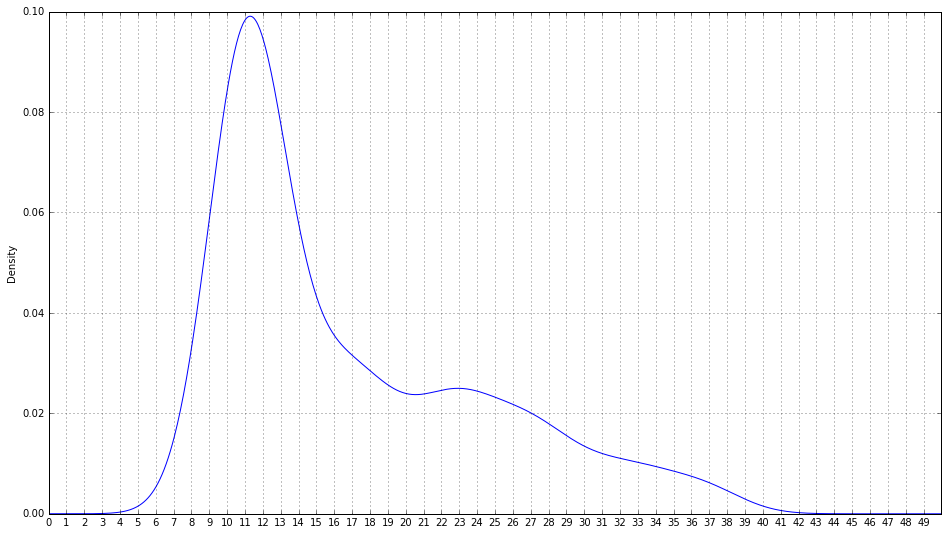

In [7]:
close=dp.close
cxt=np.arange(0,50,1)
cxl=[0,50]
close.plot(kind='kde',grid=True,figsize=(16,9),xticks=cxt,xlim=cxl)
print '最小值：',close.min()
print '最大值：',close.max()
print '平均值：',close.mean()
print '标准差：',close.std()

- 此图基本反应了 

 - 

 -  

近20日收盘价分布情况对比

最小值： 17.12
最大值： 19.17
平均值： 17.915
标准差： 0.491565704769


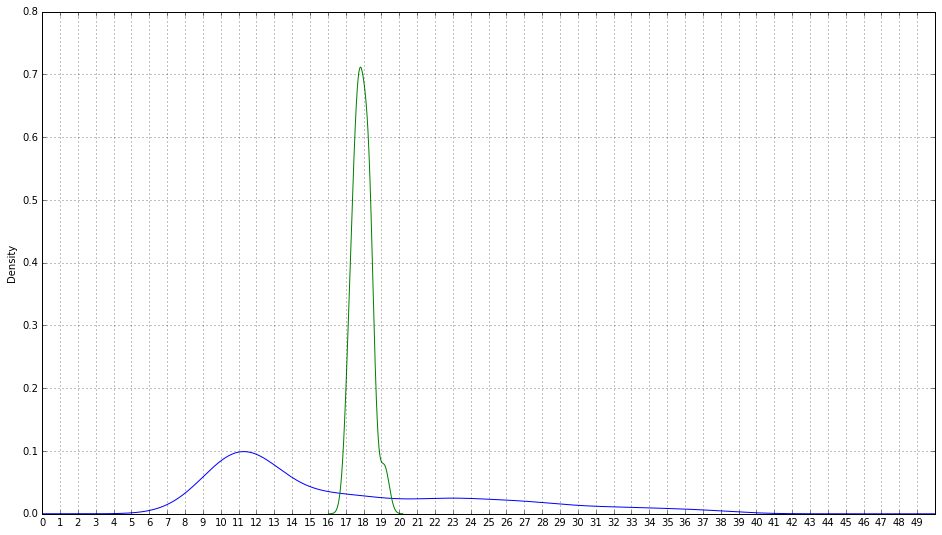

In [8]:
close20=dp[:20].close
close.plot(kind='kde',grid=True,figsize=(16,9),xticks=cxt,xlim=cxl)
close20.plot(kind='kde',grid=True,figsize=(16,9),xticks=cxt,xlim=cxl)
print '最小值：',close20.min()
print '最大值：',close20.max()
print '平均值：',close20.mean()
print '标准差：',close20.std()

近20日的收盘价数据与三年数据的对比，判断目前价格位置

### 对全部数据的收盘价分析

#### 获取全部数据

前复权数据

In [10]:
dfqfq=ts.get_h_data(code,start=starttime) 
dfqfq[:5]

[Getting data:]##########################

,open,high,close,low,volume,amount
date,,,,,,
2016-04-15,18.32,18.39,18.12,18.00,22049053.0,3.998342e+08
2016-04-14,18.35,18.52,18.36,18.12,24137623.0,4.412158e+08
2016-04-13,17.85,18.55,18.25,17.85,58582498.0,1.075903e+09
2016-04-12,17.82,17.93,17.71,17.50,19340882.0,3.417538e+08
2016-04-11,17.97,18.45,17.79,17.63,52953668.0,9.524752e+08


简单分析

In [11]:
dfqfq.describe()

,open,high,close,low,volume,amount
count,1544.000000,1544.000000,1544.000000,1544.000000,1.544000e+03,1.544000e+03
mean,14.604190,14.919430,14.620097,14.337979,3.354330e+07,6.874155e+08
std,5.796031,6.020828,5.802893,5.603520,4.370259e+07,1.232123e+09
min,7.650000,7.850000,7.660000,7.520000,1.296142e+06,1.468473e+07
25%,10.560000,10.710000,10.560000,10.420000,6.523958e+06,1.040469e+08
50%,12.325000,12.590000,12.355000,12.170000,1.751256e+07,2.315526e+08
75%,16.892500,17.242500,16.947500,16.557500,3.812452e+07,5.556710e+08
max,36.460000,38.590000,36.950000,35.720000,2.894460e+08,8.643676e+09


除权数据

In [12]:
df=ts.get_h_data(code,start=starttime,autype='None') 
df[:5]

[Getting data:]##########################

,open,high,close,low,volume,amount
date,,,,,,
2016-04-15,18.32,18.39,18.12,18.00,22049053.0,3.998342e+08
2016-04-14,18.35,18.52,18.36,18.12,24137623.0,4.412158e+08
2016-04-13,17.85,18.55,18.25,17.85,58582498.0,1.075903e+09
2016-04-12,17.82,17.93,17.71,17.50,19340882.0,3.417538e+08
2016-04-11,17.97,18.45,17.79,17.63,52953668.0,9.524752e+08


简单分析

In [13]:
df.describe()

,open,high,close,low,volume,amount
count,1544.000000,1544.000000,1544.000000,1544.000000,1.544000e+03,1.544000e+03
mean,16.924469,17.272889,16.938472,16.625693,3.354330e+07,6.874155e+08
std,6.981443,7.164620,6.971936,6.807127,4.370259e+07,1.232123e+09
min,8.180000,8.390000,8.190000,8.040000,1.296142e+06,1.468473e+07
25%,11.250000,11.427500,11.240000,11.087500,6.523958e+06,1.040469e+08
50%,13.485000,13.770000,13.470000,13.165000,1.751256e+07,2.315526e+08
75%,21.300000,21.700000,21.362500,21.000000,3.812452e+07,5.556710e+08
max,37.810000,40.010000,38.310000,37.040000,2.894460e+08,8.643676e+09


#### 收盘价分析

前复权收盘价分析

 
最小值： 7.66
最大值： 36.95
平均值： 14.6200971503
标准差： 5.80289277345


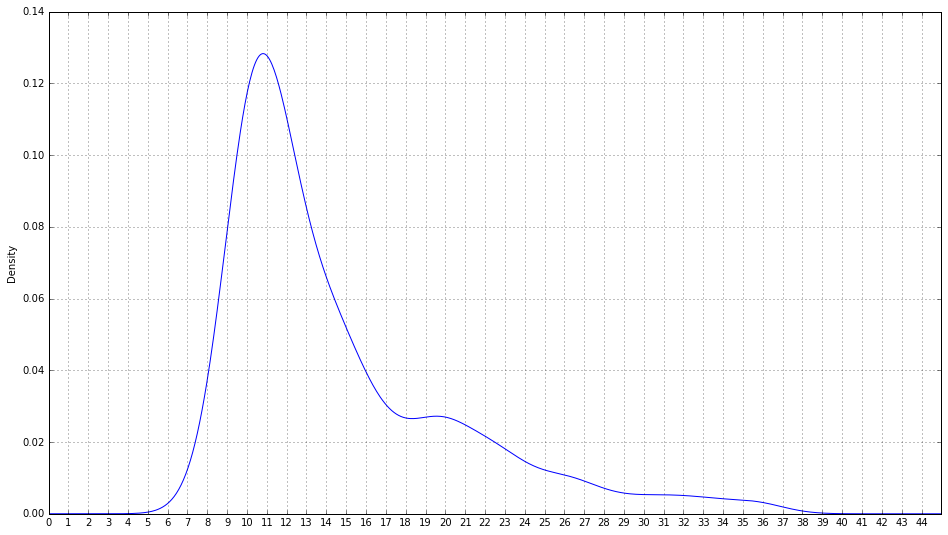

In [14]:
closeallqfq=dfqfq.close
qxt=np.arange(0,45,1)
qxl=[0,45]
closeallqfq.plot(kind='kde',grid=True,figsize=(16,9),xticks=qxt,xlim=qxl)
print ' '
print '最小值：',closeallqfq.min()
print '最大值：',closeallqfq.max()
print '平均值：',closeallqfq.mean()
print '标准差：',closeallqfq.std()

- 数据是前复权数据，因此最大值和最小值都向下滑动了。特点为：

 -  
 
  -  

与20日收盘价对比

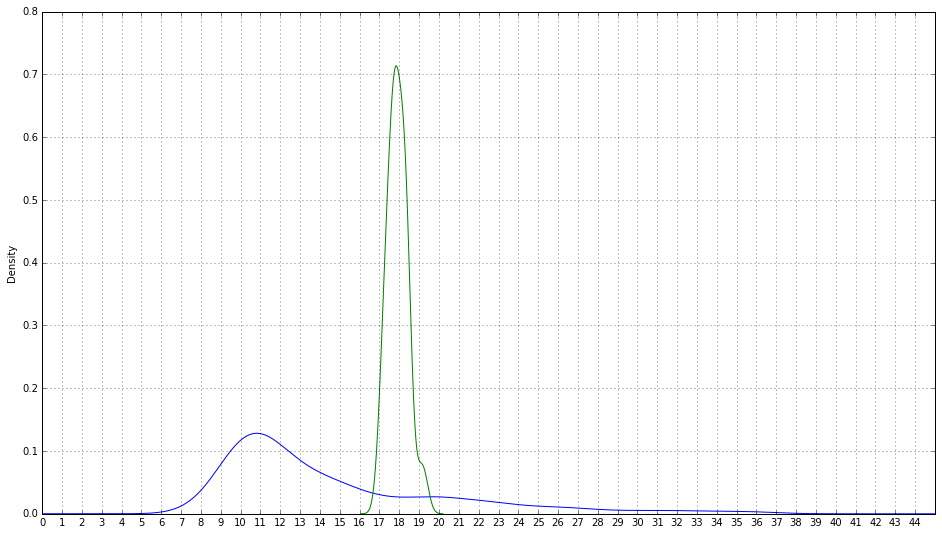

In [15]:
closeallqfq20=dfqfq[:20].close
closeallqfq.plot(kind='kde',grid=True,figsize=(16,9),xticks=qxt,xlim=qxl)
closeallqfq20.plot(kind='kde',grid=True,figsize=(16,9),xticks=qxt,xlim=qxl)

除权数据收盘价分析

最小值： 8.19
最大值： 38.31
平均值： 16.9384715026
标准差： 6.97193590111


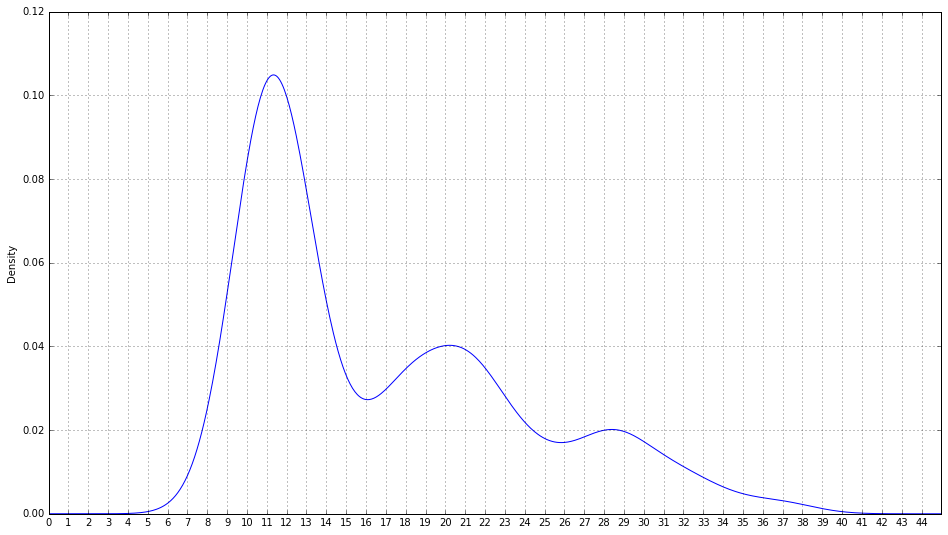

In [17]:
closeall=df.close
nxt=np.arange(0,45,1)
nxl=[0,45]
closeall.plot(kind='kde',grid=True,figsize=(16,9),xticks=nxt,xlim=nxl)
print '最小值：',closeall.min()
print '最大值：',closeall.max()
print '平均值：',closeall.mean()
print '标准差：',closeall.std()

- 除权数据的分析中，价格范围相比三年数据扩大不多。特点为：

 -  
 
 -  
 
  -  

与20日收盘价对比

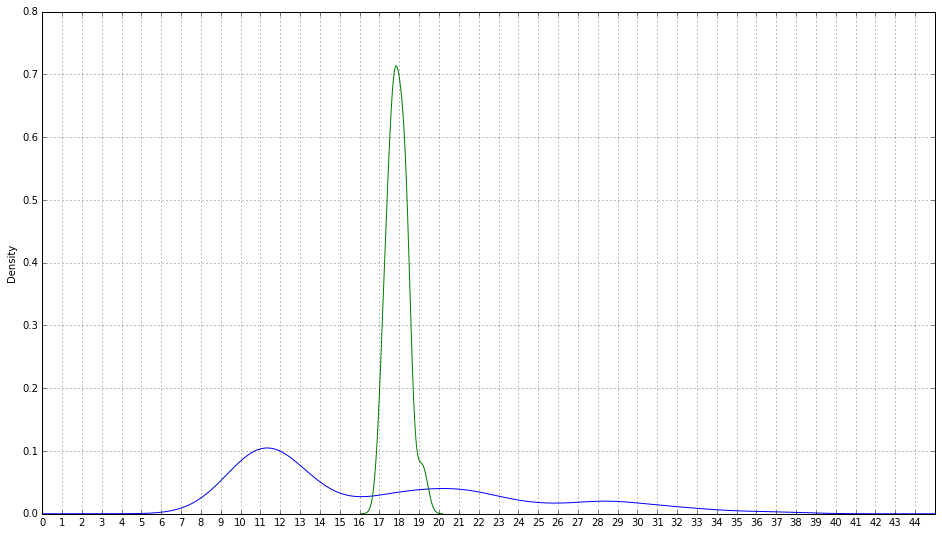

In [18]:
closeall20=df[:20].close
closeall.plot(kind='kde',grid=True,figsize=(16,9))
closeall20.plot(kind='kde',grid=True,figsize=(16,9),xticks=nxt,xlim=nxl)

*三个月多阶段对比*

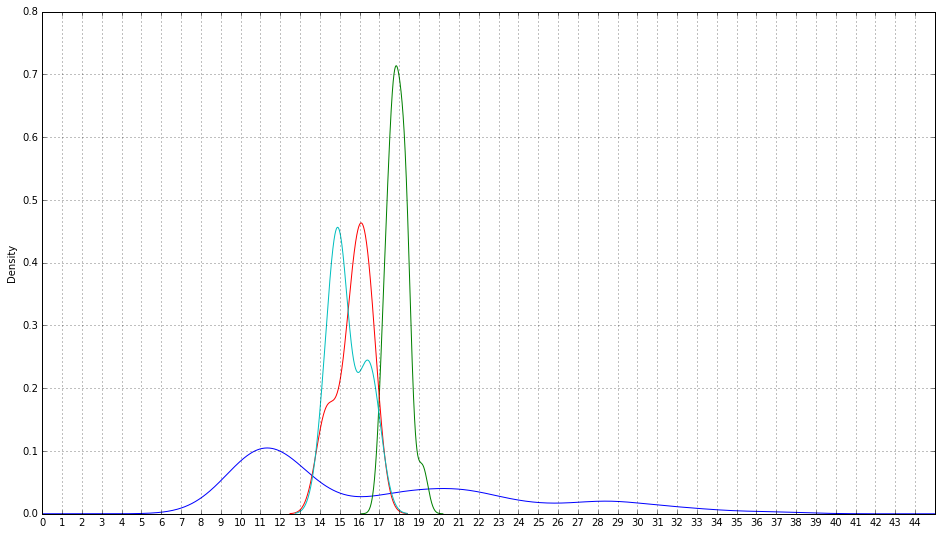

In [19]:
closeall40=df[20:40].close
closeall60=df[40:60].close
closeall.plot(kind='kde',grid=True,figsize=(16,9))
closeall20.plot(kind='kde',grid=True,figsize=(16,9))
closeall40.plot(kind='kde',grid=True,figsize=(16,9))
closeall60.plot(kind='kde',grid=True,figsize=(16,9),xticks=nxt,xlim=nxl)

In [20]:
closeall20.describe()

count    20.000000
mean     17.917500
std       0.493024
min      17.120000
25%      17.610000
50%      17.860000
75%      18.272500
max      19.170000
Name: close, dtype: float64

In [21]:
closeall40.describe()

count    20.000000
mean     15.697000
std       0.844425
min      13.970000
25%      15.335000
50%      15.870000
75%      16.265000
max      16.930000
Name: close, dtype: float64

In [22]:
closeall60.describe()

count    20.000000
mean     15.383500
std       0.867102
min      14.170000
25%      14.832500
50%      15.080000
75%      16.232500
max      16.990000
Name: close, dtype: float64

### 三年数据的换手率分析

最小值： 0.15
最大值： 6.21
平均值： 1.2298199446
标准差： 1.1017516482


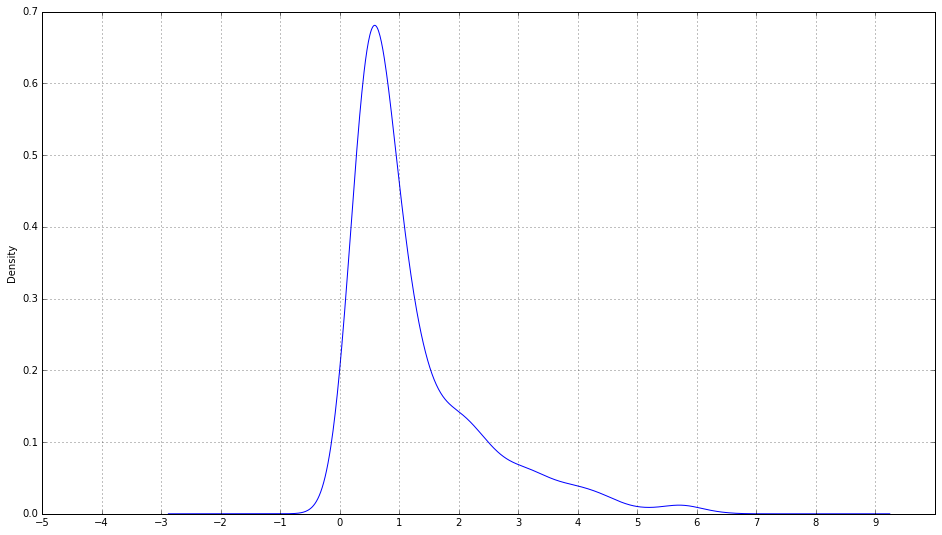

In [25]:
turnover=dp.turnover
txt=np.arange(-5,10,1)
txl=[-5,10]
turnover.plot(kind='kde',grid=True,figsize=(16,9),xticks=txt,xlim=txl)
print '最小值：',turnover.min()
print '最大值：',turnover.max()
print '平均值：',turnover.mean()
print '标准差：',turnover.std()

### 三年数据和全部数据的基本统计对比

- 三年数据：

In [26]:
dp.describe()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
count,722.000000,722.000000,722.000000,722.000000,7.220000e+02,722.000000,722.000000,722.000000,722.000000,722.000000,7.220000e+02,7.220000e+02,7.220000e+02,722.000000
mean,16.834848,17.299058,16.878075,16.462756,5.787784e+05,0.011371,0.126385,16.860542,16.840651,16.802082,5.788806e+05,5.790467e+05,5.789679e+05,1.229820
std,7.421960,7.743571,7.436612,7.152488,5.172706e+05,0.704986,3.273689,7.413673,7.389448,7.329873,4.746762e+05,4.543463e+05,4.340610e+05,1.101752
min,9.770000,9.930000,9.770000,9.250000,7.251222e+04,-3.340000,-10.010000,9.938000,10.001000,10.026000,1.070775e+05,1.138976e+05,1.271017e+05,0.150000
25%,11.092500,11.230000,11.062500,10.912500,2.374887e+05,-0.210000,-1.520000,11.075000,11.070750,11.066250,2.690338e+05,2.855862e+05,2.867176e+05,0.510000
50%,12.790000,13.065000,12.895000,12.555000,3.664840e+05,-0.010000,-0.060000,12.676000,12.590500,12.457500,3.853899e+05,3.891052e+05,3.861864e+05,0.775000
75%,22.095000,22.767500,22.127500,21.515000,7.442071e+05,0.230000,1.530000,21.989500,21.889500,21.936250,7.811770e+05,8.134120e+05,7.035353e+05,1.572500
max,37.800000,40.000000,38.300000,37.030000,2.894460e+06,2.790000,10.030000,37.340000,36.758000,36.530000,2.466336e+06,2.408160e+06,2.209337e+06,6.210000


- 全部前复权数据：

In [27]:
df.describe()

,open,high,close,low,volume,amount
count,1544.000000,1544.000000,1544.000000,1544.000000,1.544000e+03,1.544000e+03
mean,16.924469,17.272889,16.938472,16.625693,3.354330e+07,6.874155e+08
std,6.981443,7.164620,6.971936,6.807127,4.370259e+07,1.232123e+09
min,8.180000,8.390000,8.190000,8.040000,1.296142e+06,1.468473e+07
25%,11.250000,11.427500,11.240000,11.087500,6.523958e+06,1.040469e+08
50%,13.485000,13.770000,13.470000,13.165000,1.751256e+07,2.315526e+08
75%,21.300000,21.700000,21.362500,21.000000,3.812452e+07,5.556710e+08
max,37.810000,40.010000,38.310000,37.040000,2.894460e+08,8.643676e+09
